# 4-Evaluating a model 
Three ways to evaluate Scikit-learn models/estimators
1-Estimator's built-in score() method
2-The scoring parameter
3-Problem-specific metric functions

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
# ------1-score()------
np.random.seed(42)

heart_disease=pd.read_csv(r"C:\Users\murat\OneDrive\Masaüstü\VS_CODE\ML\heart-disease-scikit.csv")                                      
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier(n_estimators=1000)

clf.fit(X_train,y_train) # trainig the machine learning model
print(f"model accuracy : %{clf.score(X_test,y_test)*100:.2f}")

model accuracy : %86.89


In [5]:
#Let's use score() on regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing

housing=fetch_california_housing()
housing_df=pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df["MedHouseVal"]=housing["target"]
housing_df["target"]=housing["target"]
housing_df=housing_df.drop("MedHouseVal",axis=1)

np.random.seed(42)

X=housing_df.drop("target",axis=1)
y=housing_df["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor(n_estimators=200)
model.fit(X_train,y_train)


RandomForestRegressor(n_estimators=200)

In [10]:
model.score(X_test,y_test)

0.8068836508775645

In [11]:
# ------2-scoring parameter------

np.random.seed(42)

heart_disease=pd.read_csv(r"C:\Users\murat\OneDrive\Masaüstü\VS_CODE\ML\heart-disease-scikit.csv")                                      
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

np.random.seed(42)

X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train) # trainig the machine learning model
print(f"model accuracy : %{clf.score(X_test,y_test)*100:.2f}")

model accuracy : %85.25


In [13]:
cross_val_score(clf,X,y)#cv=5,10...
# Take a look at : https://en.wikipedia.org/wiki/Cross-validation_(statistics)#:~:text=Cross%2Dvalidation%20is%20a%20resampling,model%20will%20perform%20in%20practice.""

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [15]:
np.random.seed(42)
single_score=clf.score(X_test,y_test)
val_score=np.mean(cross_val_score(clf,X,y))
single_score,val_score

(0.8524590163934426, 0.8248087431693989)

In [ ]:
# Scoring parameter set to None by default
cross_val_score(clf,X,y,cv=5,scoring=None) # When None ,uses score()

# Classification model evaluation metrics (3-metric functions )1-Accuracy
2-Area under ROC curve
3-Confusion matrix
4-Classification report

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

clf=RandomForestClassifier()
cross_val_score(clf,X,y,cv=5),np.mean(cross_val_score(clf,X,y))

(array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333]),
 0.8018032786885245)

## ----------------------------------------

# 2-Receiver operating characteristic curve (AUC/ROC)
ROC curves are a comparison of a model's true positive (tpr) rate vs a models false positive rate (fpr) 
tpr= 1 -> 1 
fpr= 0 -> 1

In [22]:
from sklearn.metrics import roc_curve

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

clf.fit(X_train,y_train)

y_probs=clf.predict_proba(X_test)
y_probs[:10]
y_probs_positive=y_probs[:,1]
y_probs_positive[:10]

array([0.43, 0.78, 0.98, 0.06, 0.85, 0.52, 0.19, 0.28, 0.06, 0.84])

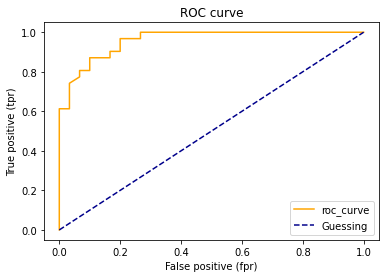

In [29]:
# Create fpr and tpr
fpr,tpr,thresholds=roc_curve(y_test,y_probs_positive)

def plot_roc_curve(fpr,tpr):
    
    plt.plot(fpr,tpr,color="orange",
    label="roc_curve")
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")

    plt.xlabel("False positive (fpr)")
    plt.ylabel("True positive (tpr)")
    plt.title("ROC curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)

In [30]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

0.9586021505376343

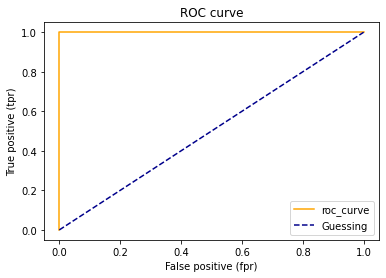

(None, 1.0)

In [32]:
# Plot perfect ROC curve and AUC score
fpr,tpr,thresholds=roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr),roc_auc_score(y_test,y_test)

# 3-Confusion Matrix

In [33]:
from sklearn.metrics import confusion_matrix

y_preds=clf.predict(X_test)

confusion_matrix(y_test,y_preds)

array([[22,  8],
       [ 1, 30]], dtype=int64)

In [35]:
# Visualize with pandas
pd.crosstab(y_test,y_preds,rownames=["Actual labels"],colnames=["Predicted labels"])

Predicted labels,0,1
Actual labels,,
0,22,8
1,1,30


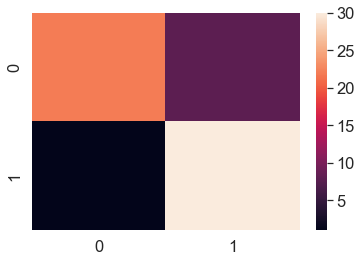

In [41]:
import seaborn as sns
sns.set(font_scale=1.5)

conf_mat=confusion_matrix(y_test,y_preds)
sns.heatmap(conf_mat);

# Quick not
-True positive = model predicts 1 when truth is 1
-False positive = model predicts 1 when truth is 0
-True negative = model predicts 0 when truth is 0
-False negative = model predicts 0 when truth is 1

In [ ]:
# You need scikit-learn==1.0
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf,X=X,y=y)

# Classification Report

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.96      0.73      0.83        30
           1       0.79      0.97      0.87        31

    accuracy                           0.85        61
   macro avg       0.87      0.85      0.85        61
weighted avg       0.87      0.85      0.85        61



## ----------------------------------------

# Regression model evaluation metrics (3-metric functions)
1- R^2 or coefficent of determination
2- Mean absolute error (MAE)
3- Mean squared error (MSE)

In [13]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X=housing_df.drop("target",axis=1)
y=housing_df["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

(0.8057655811971304, 0.8057655811971304)

In [15]:
from sklearn.metrics import r2_score

y_test_mean=np.full(len(y_test),y_test.mean())

r2_score(y_true=y_test,y_pred=y_test_mean)

0.0

# 2- Mean absolute error (MAE)
-MAE is the average of the absolute differences between preds and actual values.It gives you an idea of how wrong your models preds are

In [18]:
from sklearn.metrics import mean_absolute_error
y_preds=model.predict(X_test)

mae=mean_absolute_error(y_test,y_preds)
mae

0.3267155795542638

In [27]:
# Explanation
df=pd.DataFrame({"Actual values":y_test,"Predicted values":y_preds})
df["differences"]=df["Actual values"]-df["Predicted values"]
np.mean(abs(df["differences"]))

0.3267155795542638

# 3- Mean squared error (MSE)
-MSE is the mean of the square of the squared errors between actual and predicted values

In [29]:
from sklearn.metrics import mean_squared_error

y_preds=model.predict(X_test)
mse=mean_squared_error(y_test,y_preds)
mse

0.25452652628268335

In [ ]:
""" 
The reason that this number (MSE) is smaller than MAE is when you take
square of any number between 0 and 1 it will be smaller than itself

"""

## Pay more attention to **MAE** : When being $10k off twice as bad as being $5k off
## Pay more attention to **MSE** : When being $10k off more than twice as bad as being $5k off

## Machine Learning Model Evaluation
Evaluating the results of a machine learning model is as important as building one.

But just like how different problems have different machine learning models, different machine learning models have different evaluation metrics.

Below are some of the most important evaluation metrics you'll want to look into for classification and regression models.

Classification Model Evaluation Metrics/Techniques

**Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

**Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

**Recall**- Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

**F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

**Confusion matrix** - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).

**Cross-validation**- Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.

**Classification report** - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.

**ROC Curve** - Also known as receiver operating characteristic is a plot of true positive rate versus false-positive rate.

**Area Under Curve (AUC) Score** - The area underneath the ROC curve. A perfect model achieves an AUC score of 1.0.

 ### Which classification metric should you use?

**Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).

**Precision** and **recall** become more important when classes are imbalanced.

If false-positive predictions are worse than false-negatives, aim for higher precision.

If false-negative predictions are worse than false-positives, aim for higher recall.

F1-score is a combination of precision and recall.

A confusion matrix is always a good way to visualize how a classification model is going.

Regression Model Evaluation Metrics/Techniques

**R^2 (pronounced r-squared) or the coefficient of determination** - Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

**Mean absolute error (MAE)** - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.

**Mean squared error (MSE)** - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

Which regression metric should you use?

**R2** is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.

**MAE** gives a better indication of how far off each of your model's predictions are on average.

As for **MAE** or **MSE**, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).

Pay more attention to MAE: When being $10,000 off is **twice** as bad as being $5,000 off.

Pay more attention to MSE: When being $10,000 off is **more than twice** as bad as being $5,000 off.

## ---------------------------------------

## Finally, using the "scoring" parameter

In [6]:
# ---Classification---
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
clf=RandomForestClassifier(n_estimators=100)

In [7]:
np.random.seed(42)
cv_acc=cross_val_score(clf,X,y,cv=5,scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [14]:
np.random.seed(42)
cv_acc=cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc
print(f"cross_val_accuracy : % {np.mean(cv_acc)*100:.2f}")

cross_val_accuracy : % 82.48


In [19]:
# Precision
np.random.seed(42)
cv_precision=cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision
print(f"cross_validated precision is  : {np.mean(cv_precision):.2f}")

cross_validated precision is  : 0.83


In [23]:
# Recall
np.random.seed(42)
cv_recall=cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall
print(f"cross_validated recall is  : {np.mean(cv_recall):.2f}")

cross_validated recall is  : 0.85


In [25]:
# ---Regression---
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X=housing_df.drop("target",axis=1)
y=housing_df["target"]

model=RandomForestRegressor(n_estimators=100)

In [26]:
np.random.seed(42)
cv_r2=cross_val_score(model,X,y,cv=3,scoring=None)
np.mean(cv_r2)

0.6538316966195948

In [27]:
cv_r2

array([0.61884272, 0.72091799, 0.62173438])

In [31]:
# Mean squared error
cv_mse=cross_val_score(model,X,y,cv=3,scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.464054672554383

In [32]:
# Mean absolute error
cv_mae=cross_val_score(model,X,y,cv=3,scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.48096387187015516

In [33]:
cv_mse,cv_mae

(array([-0.51711825, -0.331075  , -0.54397076]),
 array([-0.51802042, -0.42386751, -0.50100368]))

## -----------------------------------------

## Using different evaluation metrics as Scikit-Learn functions

In [38]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier()

clf.fit(X_train,y_train)

print(f"Accuracy  : % {accuracy_score(y_test,clf.predict(X_test))*100:.2f}")
print(f"Precision  : {precision_score(y_test,clf.predict(X_test))}")
print(f"Recall  :  {recall_score(y_test,clf.predict(X_test))}")
print(f"F1_score  :  {f1_score(y_test,clf.predict(X_test))}")

Accuracy  : % 85.25
Precision  : 0.8484848484848485
Recall  :  0.875
F1_score  :  0.8615384615384615


In [45]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X=housing_df.drop("target",axis=1)
y=housing_df["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor()
model.fit(X_train,y_train)
print(f"Accuracy : % {model.score(X_test,y_test)*100:.2f}")
print(f"R2 score : {r2_score(y_test,model.predict(X_test))}")
print(f"MAE score : {mean_absolute_error(y_test,model.predict(X_test))}")
print(f"MSE score : {mean_squared_error(y_test,model.predict(X_test))}")


Accuracy : % 80.58
R2 score : 0.8057655811971304
MAE score : 0.3267155795542638
MSE score : 0.25452652628268335
